In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df=pd.read_csv("Algerian_forest_fires_dataset_Cleaned.csv")
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [7]:
df["Classes"]=df["Classes"].str.strip()
df["Classes"].unique()

array(['not fire', 'fire', nan], dtype=object)

In [8]:
df["Classes"].unique()

array(['not fire', 'fire', nan], dtype=object)

In [9]:
df.dropna(inplace=True)

In [10]:
df["Classes"]=df["Classes"].map({'not fire':0, 'fire':1}).astype(int)
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [11]:
df.drop(columns=["day","month","year"],axis=True,inplace=True)

In [12]:
df.head(2)

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0


In [13]:
df.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
Temperature,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670,0.516015,0.269555
RH,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957,-0.432161,-0.402682
Ws,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368,-0.069964,-0.181160
Rain,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422,-0.379097,-0.040013
FFMC,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132,0.769492,0.222241
DMC,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864,0.585658,0.192089
DC,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521,0.511123,-0.078734
ISI,0.603871,-0.686667,0.008532,-0.347484,0.740007,0.680454,0.508643,1.000000,0.644093,0.922895,0.735197,0.263197
BUI,0.459789,-0.353841,0.031438,-0.299852,0.592011,0.982248,0.941988,0.644093,1.000000,0.857973,0.586639,0.089408
FWI,0.566670,-0.580957,0.032368,-0.324422,0.691132,0.875864,0.739521,0.922895,0.857973,1.000000,0.719216,0.197102


In [14]:
def find_columns_have_more_threshold(df:pd.DataFrame,threshold:float):
	columns=df.columns
	removed_colums=set()
	corelation_matrix=df.corr();
	for i in range(len(columns)):
		for j in range(i):
			if abs(corelation_matrix.iloc[i,j]) > threshold :
				removed_colums.add(columns[i])
	

	return removed_colums

In [15]:
more_threshold=find_columns_have_more_threshold(df,.85)
more_threshold

{'BUI', 'DC', 'FWI'}

In [16]:
more_threshold.remove("FWI")
more_threshold

{'BUI', 'DC'}

In [17]:
df.drop(columns=more_threshold,axis=True,inplace=True)

In [18]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,ISI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,1.3,0.5,0,0
1,29,61,13,1.3,64.4,4.1,1.0,0.4,0,0
2,26,82,22,13.1,47.1,2.5,0.3,0.1,0,0
3,25,89,13,2.5,28.6,1.3,0.0,0.0,0,0
4,27,77,16,0.0,64.8,3.0,1.2,0.5,0,0


In [19]:
# Separete independent and dependent variable
X=df.drop(columns=["FWI"])
Y=df["FWI"]

In [20]:
# test and train split
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=.25,random_state=42)

<Axes: >

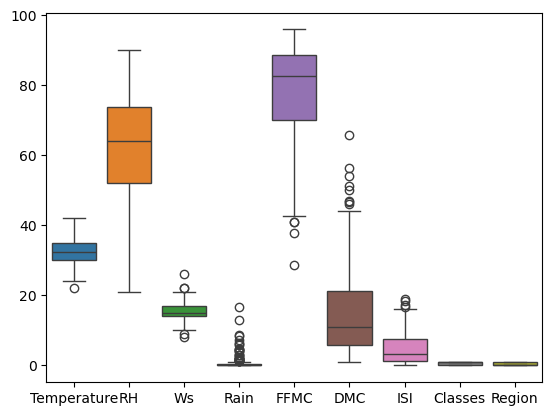

In [21]:
sns.boxplot(X_train)

In [22]:
# Standardization
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

<Axes: >

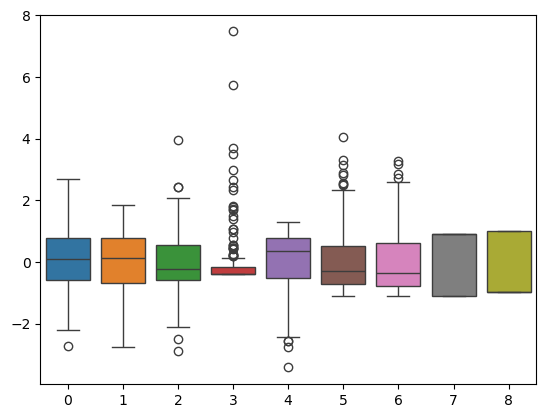

In [23]:
sns.boxplot(X_train)

## Model Apply

In [24]:
from sklearn.linear_model import Lasso,LassoCV,Ridge,RidgeCV,ElasticNet,ElasticNetCV
from sklearn.metrics import r2_score,mean_absolute_error

mse:  1.1331759949144085
R2 score:  0.9492020263112388


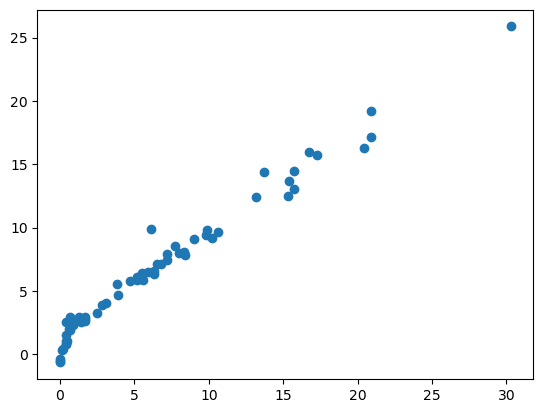

In [30]:
# Lasso regression
lasso=Lasso()
lasso.fit(X_train,Y_train)
print("mse: ",mean_absolute_error(Y_test,lasso.predict(X_test)))
print("R2 score: ",r2_score(Y_test,lasso.predict(X_test)))
plt.scatter(Y_test,lasso.predict(X_test))

mse:  0.6199701158263432
R2 score:  0.9820946715928275
alpha:  0.05725391318234408


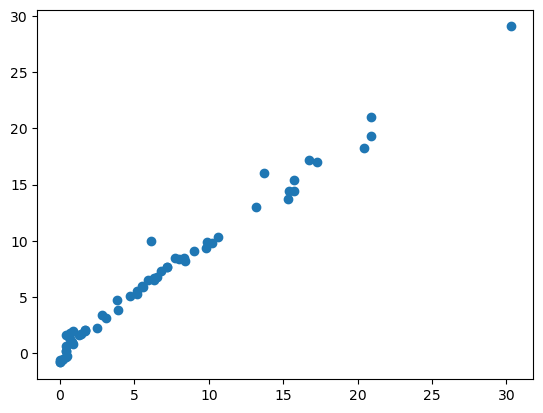

In [32]:
# Lasso CV regression (Cross Validetion)
lassocv=LassoCV()
lassocv.fit(X_train,Y_train)
print("mse: ",mean_absolute_error(Y_test,lassocv.predict(X_test)))
print("R2 score: ",r2_score(Y_test,lassocv.predict(X_test)))
print("alpha: ",lassocv.alpha_)
plt.scatter(Y_test,lassocv.predict(X_test))

mse:  0.5642305340105717
R2 score:  0.9842993364555513


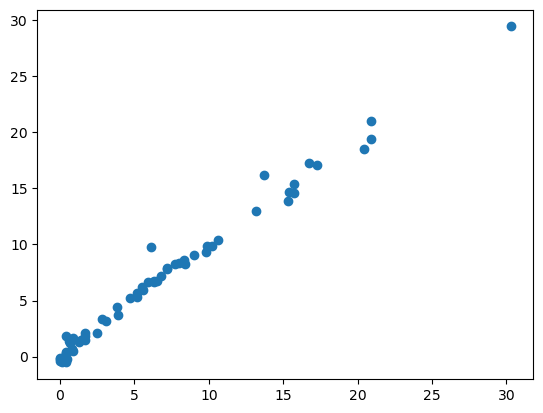

In [33]:
# Ridge regression
ridge=Ridge()
ridge.fit(X_train,Y_train)
print("mse: ",mean_absolute_error(Y_test,ridge.predict(X_test)))
print("R2 score: ",r2_score(Y_test,ridge.predict(X_test)))
plt.scatter(Y_test,ridge.predict(X_test))

mse:  0.5642305340106
R2 score:  0.984299336455544
Alpha :  1.0


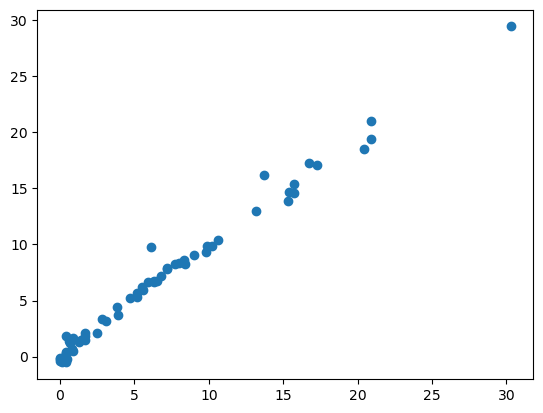

In [35]:
# Ridge CV regression
ridgecv=RidgeCV()
ridgecv.fit(X_train,Y_train)
print("mse: ",mean_absolute_error(Y_test,ridgecv.predict(X_test)))
print("R2 score: ",r2_score(Y_test,ridgecv.predict(X_test)))
print("Alpha : ",ridgecv.alpha_)
plt.scatter(Y_test,ridgecv.predict(X_test))

mse:  1.8822353634896
R2 score:  0.8753460589519703


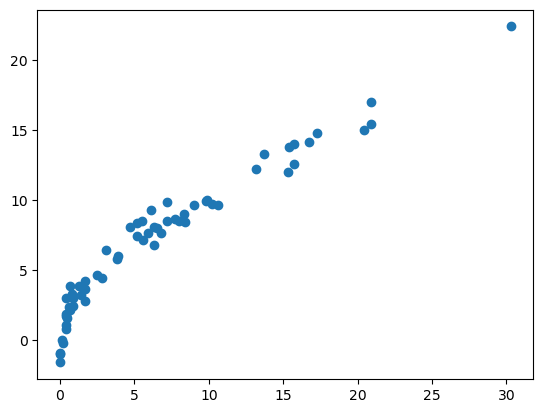

In [37]:
# ElasticNet regression
elasticnet=ElasticNet()
elasticnet.fit(X_train,Y_train)
print("mse: ",mean_absolute_error(Y_test,elasticnet.predict(X_test)))
print("R2 score: ",r2_score(Y_test,elasticnet.predict(X_test)))
plt.scatter(Y_test,elasticnet.predict(X_test))

mse:  0.6575946731430905
R2 score:  0.9814217587854941
Alpha :  0.04311146156383891


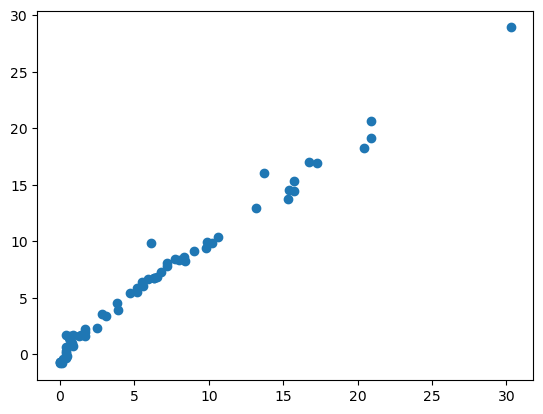

In [36]:
# Elasticnet CV regression
elasticnetcv=ElasticNetCV()
elasticnetcv.fit(X_train,Y_train)
print("mse: ",mean_absolute_error(Y_test,elasticnetcv.predict(X_test)))
print("R2 score: ",r2_score(Y_test,elasticnetcv.predict(X_test)))
print("Alpha : ",elasticnetcv.alpha_)
plt.scatter(Y_test,elasticnetcv.predict(X_test))